Imports

In [2]:
import os

os.environ['STANFORD_PARSER'] = "stanford-parser-4.2.0/stanford-parser-full-2020-11-17/stanford-parser.jar"
os.environ['STANFORD_MODELS'] = "stanford-parser-4.2.0/stanford-parser-full-2020-11-17/stanford-parser-4.2.0-models.jar"


import wikipedia
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk import pos_tag, word_tokenize, CFG
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tag.stanford import StanfordPOSTagger
from nltk.parse.stanford import StanfordParser
from nltk.parse import ShiftReduceParser, RecursiveDescentParser


### 1) 
Choose a wikipedia article. You will download and acces the article using this python module: wikipedia. Use the content property to extract the text. Print the title of the article and the first N=200 words from the article to verify that all works well. Print the POS-tagging for the first N=20 sentences.

In [3]:
wikipedia.set_lang("en")
page = wikipedia.page(title="English language")

content = page.content

print("Title: ", page.title)
# Print the first N=200 words from the article
words = word_tokenize(content)
print("First 200 words: ", ' '.join(words[:200]))

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Print the POS-tagging for the first N=20 sentences
sentences = sent_tokenize(content)
for i, sent in enumerate(sentences[:20]):
    print(f"Sentence {i+1} POS tags: ", nltk.pos_tag(word_tokenize(sent)))


Title:  English language
First 200 words:  English is a West Germanic language in the Indo-European language family , whose speakers , called Anglophones , originated in early medieval England . The namesake of the language is the Angles , one of the ancient Germanic peoples that migrated to the island of Great Britain . English is the most spoken language in the world , primarily due to the global influences of the former British Empire ( succeeded by the Commonwealth of Nations ) and the United States . English is the third-most spoken native language , after Mandarin Chinese and Spanish ; it is also the most widely learned second language in the world , with more second-language speakers than native speakers . English is either the official language or one of the official languages in 59 sovereign states ( such as in India , Ireland , and Canada ) . In some other countries , it is the sole or dominant language for historical reasons without being explicitly defined by law ( such as 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chimi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chimi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Sentence 1 POS tags:  [('English', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('West', 'NNP'), ('Germanic', 'NNP'), ('language', 'NN'), ('in', 'IN'), ('the', 'DT'), ('Indo-European', 'JJ'), ('language', 'NN'), ('family', 'NN'), (',', ','), ('whose', 'WP$'), ('speakers', 'NNS'), (',', ','), ('called', 'VBN'), ('Anglophones', 'NNS'), (',', ','), ('originated', 'VBN'), ('in', 'IN'), ('early', 'JJ'), ('medieval', 'NN'), ('England', 'NNP'), ('.', '.')]
Sentence 2 POS tags:  [('The', 'DT'), ('namesake', 'NN'), ('of', 'IN'), ('the', 'DT'), ('language', 'NN'), ('is', 'VBZ'), ('the', 'DT'), ('Angles', 'NNP'), (',', ','), ('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('ancient', 'NN'), ('Germanic', 'NNP'), ('peoples', 'VBZ'), ('that', 'WDT'), ('migrated', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('island', 'NN'), ('of', 'IN'), ('Great', 'NNP'), ('Britain', 'NNP'), ('.', '.')]
Sentence 3 POS tags:  [('English', 'NNP'), ('is', 'VBZ'), ('the', 'DT'), ('most', 'RBS'), ('spoken', 'JJ'), ('language', 'NN'), ('in',

### 2)
Create a function that receives a part of speech tag and returns a list with all the words from the text (can be given as a parameter too) that represent that part of speech. Create a function that receives a list of POS tags and returns a list with words having any of the given POS tags (use the first function in implementing the second one).

In [4]:
def get_words_for_pos(text, pos_tag):
    words = word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    return list(set([word for word, tag in pos_tags if tag == pos_tag]))

def get_words_for_pos_list(text, pos_tags_list):
    result = []
    for pos_tag in pos_tags_list:
        result.extend(get_words_for_pos(text, pos_tag))
    return result

In [5]:
text = ' '.join(words[:1000])

# Get all the nouns from the text
nouns = get_words_for_pos(text, 'NN')
print("Nouns:", nouns)

# Get all the verbs from the text
verbs = get_words_for_pos(text, 'VB')
print("Verbs:", verbs)

# Get all the words that are either nouns or verbs
nouns_or_verbs = get_words_for_pos_list(text, ['NN', 'VB'])
print("Nouns or Verbs:", nouns_or_verbs)

Nouns: ['living', 'series', 'creole—a', 'start', 'use', 'trade', 'vocabulary', 'contact', 'verbs', 'world', 'island', 'grammar', 'law', 'family', 'influence', 'turn', 'division', 'diplomacy', 'Dutch', 'phonology', 'technology', 'ancient', 'tourism', 'theory', 'sound', 'core', 'amount', 'science', 'entertainment', 'clades—but', 'ancestor', 'continent', 'group', 'share', 'trend', 'grouping', 'modal', 'language', 'hypothesis', 'creole', 'history', 'medieval', 'number', 'branch', 'aviation', 'sole', 'internet', 'tribal', '%', 'century', 'continuum', 'coast', 'palatalisation', 'development', 'namesake', 'mark', 'dialect']
Verbs: ['see', 'form', 'be', 'keep', 'do', 'consider', 'show']
Nouns or Verbs: ['living', 'series', 'creole—a', 'start', 'use', 'trade', 'vocabulary', 'contact', 'verbs', 'world', 'island', 'grammar', 'law', 'family', 'influence', 'turn', 'division', 'diplomacy', 'Dutch', 'phonology', 'technology', 'ancient', 'tourism', 'theory', 'sound', 'core', 'amount', 'science', 'ente

### 3)
Use the function above to print all the nouns (there are multiple tags for nouns), and, respectively all the verbs (corresponding to all verb tags). Also, print the percentage of content words (noun+verbs) from the entire text

In [6]:
# Define the POS tags for nouns and verbs
noun_tags = ['NN', 'NNS', 'NNP', 'NNPS']
verb_tags = ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']

nouns = get_words_for_pos_list(content, noun_tags)
verbs = get_words_for_pos_list(content, verb_tags)

print("Nouns: ", nouns)
print("Verbs: ", verbs)

content_words = len(nouns) + len(verbs)
total_words = len(word_tokenize(content))
percentage = (content_words / total_words) * 100
print(f"Percentage of content words: {percentage:.2f}%")

Nouns:  ['stress', 'shift', 'r', 'morning', 'quality', 'd', 'scuba', 'e.g.', 'variability', 'i.e', 'information', 'inversion', 'b̥ɪˑn', 'cue', 'economy', 'tense', 'copular', 'get', 'remainder', 'standardisation', 'population', 'morphology', 'basis', 'phrase', 'y', 'spread', 'philosophy', 'holu', 'pace', 'risk', 'k', 'vowel', 'sword', 'p̚', 'bone', 'hypothesis', 'home', 'mood', 'ancestry', 'sw/', 'han', 'basilect', 'study', 'conquest', 'sovereign', 'oh', 'rationale', 'chain', 'verb', '-t', 'subset', 'member', 'development', 'photograph', 'migration', 'telecommunications', 'instruction', 'flap', 's', 'accent', 'pʰ', 'pin', 'one', 'ideal', 'contact', '/ð/', 'dreamt', 'word-formation', 'past', 'version', '⟨æ⟩', 'mention', 'light', 'myriad', 'presence', 'conjugation', 'play', 'settlement', 'reverse', 'lenis', 'ch', 'advantage', 'combination', 'yod-coalescence', 'complement', 'terminate', 'conversion', 'event', 'feature', 'themself', 'wave', '/ɡ/', 'spectrum', 'consensus', 'coda', 'afterthou

### 4)
Print a table of four columns. The columns will be separated with the character "|". The head of the table will be:

Original word | POS | Simple lemmatization | Lemmatization with POS

that will compare the results of lemmatization (WordNetLemmatizer) without giving the part of speech and the lemmatization with the given part of speech for each word. The table must contain only words that give different results for the two lemmatizations (for example, the word "running" - without POS, the result will always be running, but with pos="v" it is "run"). The table will contain the results for the first N sentences from the text (each row corresponding to a word). Try to print only distinct results inside the table (for example, if a word has two occurnces inside the text, and matches the requirments for appearing in the table, it should have only one corresponding row).

In [7]:
lemmatizer = WordNetLemmatizer()

# Function to get the wordnet POS tag
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

sentences = nltk.sent_tokenize(content)

# Number of sentences to process
N = 10 

# Process the sentences
results = []
for sentence in sentences[:N]:
    words = nltk.word_tokenize(sentence)
    tagged_words = pos_tag(words)
    
    for word, tag in tagged_words:
        wn_tag = get_wordnet_pos(tag)
        if wn_tag:
            lemma_with_pos = lemmatizer.lemmatize(word, pos=wn_tag)
            lemma_without_pos = lemmatizer.lemmatize(word)
            if lemma_with_pos != lemma_without_pos:
                results.append((word, tag, lemma_without_pos, lemma_with_pos))

# Remove duplicates
results = list(set(results))

print("Original word".ljust(20) + " | " + "POS".ljust(5) + " | " + "Simple lemmatization".ljust(20) + " | " + "Lemmatization with POS")
for row in results:
    print(row[0].ljust(20) + " | " + row[1].ljust(5) + " | " + row[2].ljust(20) + " | " + row[3])


Original word        | POS   | Simple lemmatization | Lemmatization with POS
estimated            | VBN   | estimated            | estimate
emerged              | VBD   | emerged              | emerge
migrated             | VBD   | migrated             | migrate
spoken               | VBN   | spoken               | speak
were                 | VBD   | were                 | be
defined              | VBN   | defined              | define
originated           | VBN   | originated           | originate
being                | VBG   | being                | be
is                   | VBZ   | is                   | be
learned              | VBN   | learned              | learn
called               | VBN   | called               | call
succeeded            | VBN   | succeeded            | succeed
was                  | VBD   | wa                   | be
has                  | VBZ   | ha                   | have


### 5)
Print a graphic showing the number of words for each part of speech. If there are too many different parts of speech, you can print only those with a higher number of corresponding words.


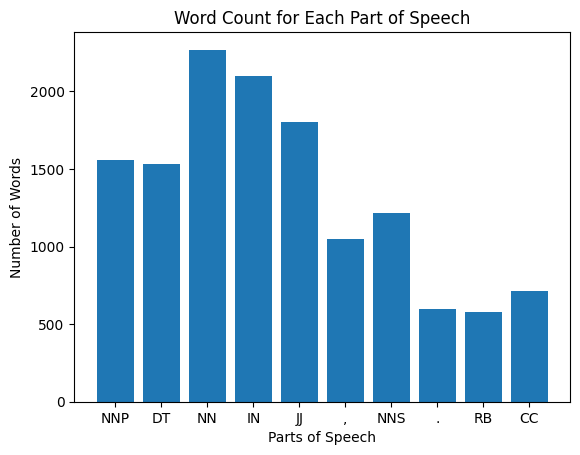

In [8]:
text = content
threshold = 500

tokens = word_tokenize(text)
tagged_tokens = pos_tag(tokens)

# Count the frequency of each POS
pos_counts = Counter(tag for word, tag in tagged_tokens)

# Filter POS with higher number of words
filtered_pos_counts = {pos: count for pos, count in pos_counts.items() if count > threshold}

plt.bar(filtered_pos_counts.keys(), filtered_pos_counts.values())
plt.xlabel('Parts of Speech')
plt.ylabel('Number of Words')
plt.title('Word Count for Each Part of Speech')
plt.show()


### 6)
Create your own grammar with different terminal symbols. Apply recursive descent parsing on a sentence with at least 5 different parts of speech and a tree of at least level 4.

In [13]:
# Define paths to the model and jar files
model_path = "stanford-tagger-4.2.0/stanford-postagger-full-2020-11-17/models/english-bidirectional-distsim.tagger"
jar_tagger_path = "stanford-tagger-4.2.0/stanford-postagger-full-2020-11-17/stanford-postagger.jar"

tagger = StanfordPOSTagger(model_path, jar_tagger_path)
sentence = "I am going to play some new sport this week"
tagged_sentence = tagger.tag(sentence.split(" "))
print(tagged_sentence)

# Define path to the parser model
parser_model_path = "stanford-parser-4.2.0/stanford-parser-full-2020-11-17/stanford-parser-4.2.0-models/edu/models/lexparser/englishPCFG.ser.gz"


parser = StanfordParser(model_path=parser_model_path, java_options='-mx2g')
parsed_sentence = list(parser.raw_parse(sentence))

# Print the parse tree
for tree in parsed_sentence:
    tree.pretty_print()

# ##########################################################################################

grammar = CFG.fromstring("""
  ROOT -> S
  S -> NP VP
  VP -> VBP VP | TO VP | VB NP NP
  NP -> PRP | DT JJ NN | DT NN
  VBP -> "am"
  VBG -> "going"
  TO -> "to"
  VB -> "play"
  PRP -> "I"
  DT -> "some" | "this"
  JJ -> "new"
  NN -> "sport" | "week"
""")

tokens = sentence.split(" ")

# Recursive Descent Parsing
rdp = RecursiveDescentParser(grammar)
for tree in rdp.parse(tokens):
    tree.pretty_print()

[('I', 'PRP'), ('am', 'VBP'), ('going', 'VBG'), ('to', 'TO'), ('play', 'VB'), ('some', 'DT'), ('new', 'JJ'), ('sport', 'NN'), ('this', 'DT'), ('week', 'NN')]


C:\Users\chimi\AppData\Local\Temp\ipykernel_12408\1487396463.py:14: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.CoreNLPParser instead.
  parser = StanfordParser(model_path=parser_model_path, java_options='-mx2g')


    ROOT                                            
     |                                               
     S                                              
  ___|_____                                          
 |         VP                                       
 |    _____|____                                     
 |   |          VP                                  
 |   |      ____|___                                 
 |   |     |        S                               
 |   |     |        |                                
 |   |     |        VP                              
 |   |     |     ___|_________                       
 |   |     |    |             VP                    
 |   |     |    |    _________|______________        
 NP  |     |    |   |         NP             NP     
 |   |     |    |   |     ____|____      ____|___    
PRP VBP   VBG   TO  VB   DT   JJ   NN   DT       NN 
 |   |     |    |   |    |    |    |    |        |   
 I   am  going  to play some new spor

### 7)
Apply shift reduce parsing on the same sentence and check programatically if the two trees are equal. Find a sentence with equal trees and a sentence with different results (we consider the tree different even when it has no sollution for one of the parsers, but has for the other).

In [20]:
# Define the grammar for shift-reduce parsing
grammar = CFG.fromstring("""
    ROOT -> S
    S -> NP VP
    VP -> VBP VP | TO VP | VB NP NP
    NP -> PRP | DT JJ NN | DT NN
    VBP -> "am"
    VBG -> "going"
    TO -> "to"
    VB -> "play"
    PRP -> "I"
    DT -> "some" | "this"
    JJ -> "new"
    NN -> "sport" | "week"
""")


sr_parser = ShiftReduceParser(grammar)

sr_parsed_sentence = list(sr_parser.parse(sentence.split(" ")))

# Check if the trees are equal
trees_equal = parsed_sentence == sr_parsed_sentence
print("Are the trees equal?", trees_equal)

# Print the trees
print("Stanford Parser Tree:")
for tree in parsed_sentence:
    tree.pretty_print()

print("Shift-Reduce Parser Tree:")
for tree in sr_parsed_sentence:
    tree.pretty_print()

# Find a sentence with equal trees
equal_sentence = "I am going to play some sport this week"
equal_parsed_sentence = list(parser.raw_parse(equal_sentence))
equal_sr_parsed_sentence = list(sr_parser.parse(equal_sentence.split()))
print("Equal trees for sentence:", equal_sentence, equal_parsed_sentence == equal_sr_parsed_sentence)

# Print the trees
print("Stanford Parser Tree for equal sentence:")
for tree in equal_parsed_sentence:
    tree.pretty_print()

print("Shift-Reduce Parser Tree for equal sentence:")
for tree in equal_sr_parsed_sentence:
    tree.pretty_print()

Are the trees equal? False
Stanford Parser Tree:
    ROOT                                            
     |                                               
     S                                              
  ___|_____                                          
 |         VP                                       
 |    _____|____                                     
 |   |          VP                                  
 |   |      ____|___                                 
 |   |     |        S                               
 |   |     |        |                                
 |   |     |        VP                              
 |   |     |     ___|_________                       
 |   |     |    |             VP                    
 |   |     |    |    _________|______________        
 NP  |     |    |   |         NP             NP     
 |   |     |    |   |     ____|____      ____|___    
PRP VBP   VBG   TO  VB   DT   JJ   NN   DT       NN 
 |   |     |    |   |    |    |    |    | 

In [23]:
nltk.app.srparser()

[('dog',)]
[('statue',)]
[('park',)]
[('dog',), ('statue',)]
[('in',)]
[('with',)]
[('the',)]
[('a',)]
[(V, NP, PP)]
[(V, NP)]
[(VP, PP)]
[(V, NP, PP), (V, NP)]
[(Det, N)]
[(NP, PP)]
S [(NP, VP)]
NP [(Det, N), (NP, PP)]
VP [(VP, PP), (V, NP, PP), (V, NP)]
PP [(P, NP)]
NP [('I',)]
Det [('the',), ('a',)]
N [('man',)]
V [('saw',)]
P [('in',), ('with',)]
N [('park',), ('dog',), ('statue',)]
Det [('my',)]
